# Homework 2 (Feed Forward Neural Networks)

Choose a dataset that you're interested in from among these options (or choose your own data set as long as it's large enough and **you check with me** in advance):

- [Apple Quality](https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality)
- [House Rent Data](https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset/data)
- [American Sign Lanugage MNIST](https://www.kaggle.com/datasets/datamunge/sign-language-mnist)
- [Spam Emails](https://archive.ics.uci.edu/ml/datasets/Spambase)
- [European Soccer Data](https://www.kaggle.com/datasets/hugomathien/soccer)


1. Then Build a Deep FEED FORWARD Neural Network (No Convolutional or Recurrent Layers) using keras/tensorflow (at least 3 *hidden* layers) to predict either a category or a continuous value.

Make sure that:

- your NN has some sort of regularization (or multiple types if needed)
- you've cleand your data (e.g. one hot encoded, got rid of dollar signs...etc) as needed before training
- you've properly z-scored or otherwise scaled your data before training
- your **model architechture** and **loss function** are appropriate for the problem
- you print out **at least 2 metrics** for both train and test data to examine

2. Then, using the SAME predictors and outcome, **build a simpler ML model from 392** (some options listed below with documentation) and check if your Neural Net did better (essentially I want you to PROVE whether you needed a neural network for the task or not).


In [7]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

#from keras.datasets import mnist
import tensorflow.keras as kb
from tensorflow.keras import backend
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.metrics import categorical_crossentropy, Accuracy, AUC
#from tensorflow.keras.utils import to_categorical

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor # Decision Tree

from plotnine import *

from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, ConfusionMatrixDisplay, roc_auc_score, recall_score, precision_score

from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.preprocessing import LabelBinarizer

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv

# gridsearch
from sklearn.model_selection import GridSearchCV

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# make kaggle directory
!mkdir ~/.kaggle

# move kaggle.json to hidden kaggle folder
!cp kaggle.json ~/.kaggle/

# change permissions on file
!chmod 600 ~/.kaggle/kaggle.json

# download zipped data
# !kaggle datasets download -d tolgadincer/labeled-chest-xray-images
!kaggle datasets download -d nelgiriyewithana/apple-quality

  0% 0.00/170k [00:00<?, ?B/s]
100% 170k/170k [00:00<00:00, 114MB/s]


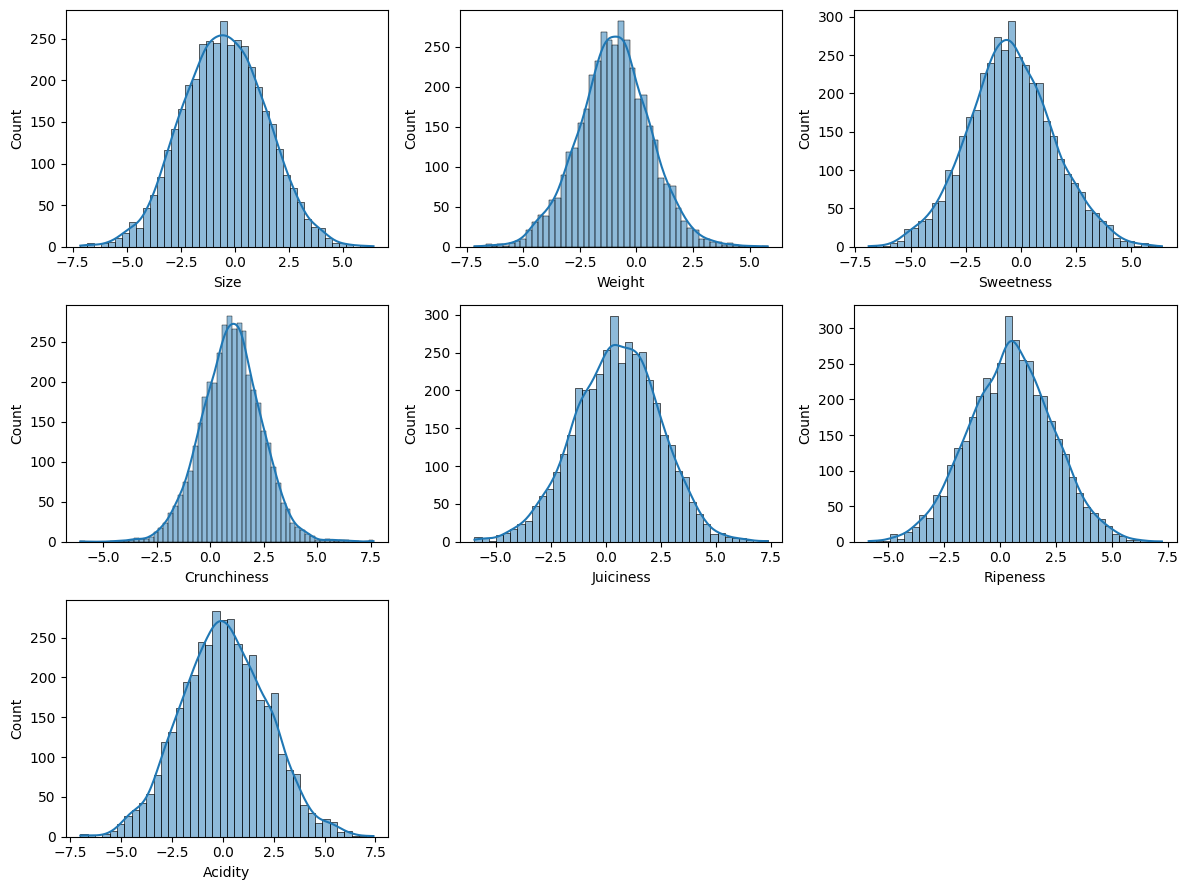

In [11]:
#sns.pairplot(df, hue='Group')
# ChatGPT for EDA Code to graph

plt.figure(figsize=(12, 9))

# Exclude both 'Quality' and 'A_id' columns and draw histograms for the remaining columns
excluded_columns = ['Quality', 'A_id']
columns_to_plot = [column for column in df.columns if column not in excluded_columns]

for i, column in enumerate(columns_to_plot):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[column], kde=True)

plt.tight_layout()
plt.show()

In [12]:
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


In [14]:
df = pd.read_csv("apple_quality.csv")
#df.head()
feats = [f for f in df.columns if f not in ["A_id", "Quality"]]
predict = "Quality"

#print(df.shape)
X = df[feats]
y = df[predict]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

# change the labels to be in the correct format
lb = LabelBinarizer()
trainY = lb.fit_transform(y_train)
testY = lb.transform(y_test)


z = StandardScaler()
X_train[feats] = z.fit_transform(X_train[feats])
X_test[feats] = z.transform(X_test[feats])


# build structure of the model
model = kb.Sequential([
    kb.layers.Dense(7, input_shape =[7]), #input with 7 features
    kb.layers.Dense(6, kernel_regularizer=l2(0.001)),
    kb.layers.Dense(5),
    Dropout(0.2),
    kb.layers.Dense(4, kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    kb.layers.Dense(3),
    kb.layers.Dense(2),
    kb.layers.Dense(1, activation = "sigmoid") #output
])

# compile model
model.compile(optimizer = "Adam",
              loss = "binary_crossentropy",
              metrics = ["accuracy", AUC()])

print(model.summary())

#fit the model (same as SKlearn)
model.fit(X_train, trainY,
          epochs = 30,
          validation_data=(X_test, testY))

# evaluate the model
model.evaluate(X_test, testY)



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 7)                 56        
                                                                 
 dense_22 (Dense)            (None, 6)                 48        
                                                                 
 dense_23 (Dense)            (None, 5)                 35        
                                                                 
 dropout_6 (Dropout)         (None, 5)                 0         
                                                                 
 dense_24 (Dense)            (None, 4)                 24        
                                                                 
 dropout_7 (Dropout)         (None, 4)                 0         
                                                                 
 dense_25 (Dense)            (None, 3)                

[0.5238500833511353, 0.7437499761581421, 0.8207755088806152]


- [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- [KNN Regression](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)
- [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)
- [Decision Tree Regression](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
- [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
- [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
- [Random Forest Regression](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)


Lastly, create a **technical report** discussing your model building process, the results, and your reflection on it. The report should follow the format in the example including an Introduction, Analysis, Methods, Results, and Reflection section. Your report is practice for presenting results to non-technical audiences in your Data Science career (e.g. your boss, CEO, shareholders...)

In [17]:

# 3. Set up the hyperparameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# 4. Initialize the GridSearchCV object
dt_grid_search = GridSearchCV(DecisionTreeClassifier(),
                              param_grid,
                              cv=5,
                              scoring='roc_auc',
                              verbose=1)

# 5. Fit it to the training data
dt_grid_search.fit(X_train, y_train)

# 6. Extract the best estimator
best_dt = dt_grid_search.best_estimator_

# 7. Make predictions with the best estimator
y_pred_train = best_dt.predict(X_train)
y_pred_test = best_dt.predict(X_test)

y_pred_train_p = best_dt.predict_proba(X_train)[:, 1]
y_pred_test_p = best_dt.predict_proba(X_test)[:, 1]

# 8. Assess model
print("Train Acc:", accuracy_score(y_train, y_pred_train))
print("Test Acc :", accuracy_score(y_test, y_pred_test))
print("Train ROC AUC:", roc_auc_score(y_train, y_pred_train_p))
print("Test ROC AUC :", roc_auc_score(y_test, y_pred_test_p))

# Optionally, print the best hyperparameters
print("Best hyperparameters:", dt_grid_search.best_params_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Train Acc: 0.8915625
Test Acc : 0.8125
Train ROC AUC: 0.9675789630768606
Test ROC AUC : 0.8899843652282677
Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}


# Technical Report Sections

[Report Template](https://github.com/cmparlettpelleriti/CPSC393ParlettPelleriti/blob/main/Homework/HW2_Template.qmd)

## Introduction
An introduction should introduce the problem and data you're working on, give some background and relevant detail for the reader, and explain why it is important.

## Analysis
Any exploratory analysis of your data, and general summarization of the data (e.g. summary statistics, correlation heatmaps, graphs, information about the data...). Tell the reader about the types of variables you have and some general information about them, Plots and/or Tables are always great. This should also include any cleaning and joining you did.

If you want a table you can make one with [this website](https://www.tablesgenerator.com/markdown_tables) and paste the markdown table here. For example:

## Methods
Explain the structure of your model and your approach to building it. This can also include changes you made to your model in the process of building it. Someone should be able to read your methods section and *generally* be able to tell exactly what architechture you used. However REMEMBER that this should be geared towards an audience who might not understand Keras code.

## Results
Detailed discussion of how your model performed. Include a discussion about whether or not Deep Learning was necessary in this situation.

## Reflection
Reflections on what you learned/discovered in the process of doing the assignment. Write about any struggles you had (and hopefully overcame) during the process. Things you would do differently in the future, ways you'll approach similar problems in the future, etc.



# What to Turn In

- PDF of your technical report (rendered through Quarto)
- your code as a .py, .ipynb, or link to github (you must turn it in either as a file, or a link to something that has timestamps of when the file was last edited)
- a README file as a .txt or .md